In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, CuDNNLSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
EPOCHS = 10
BATCH_SIZE = 64
NAME = 'LSTM-EPOCHS-10'

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [5]:
model = Sequential()

model.add(Embedding(20000, 256, input_length=200))

model.add(CuDNNLSTM(256, return_sequences=True))
model.add(Dropout(0.6))

model.add(CuDNNLSTM(128, return_sequences=True))
model.add(Dropout(0.6))

model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dropout(0.6))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs/' + NAME)

filepath = 'LSTM_Final'
checkpoint = ModelCheckpoint('models/{}.hdf5'.format(filepath, monitor='val_acc',
                                                      verbose=1,
                                                      save_best_only = True,
                                                      mode = 'max'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          5120000   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 200, 256)          526336    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 200, 128)          197632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 64)                49664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size = BATCH_SIZE, verbose=1, callbacks = [tensorboard, checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 273s 11ms/step - loss: 0.6597 - acc: 0.5766 - val_loss: 0.4443 - val_acc: 0.7963
Epoch 2/10
25000/25000 [==============================] - 253s 10ms/step - loss: 0.3953 - acc: 0.8465 - val_loss: 0.3230 - val_acc: 0.8635
Epoch 3/10
25000/25000 [==============================] - 262s 10ms/step - loss: 0.2719 - acc: 0.9109 - val_loss: 0.3461 - val_acc: 0.8641
Epoch 4/10
25000/25000 [==============================] - 265s 11ms/step - loss: 0.2061 - acc: 0.9374 - val_loss: 0.4447 - val_acc: 0.8577
Epoch 5/10
25000/25000 [==============================] - 267s 11ms/step - loss: 0.1611 - acc: 0.9563 - val_loss: 0.4028 - val_acc: 0.8553
Epoch 6/10
25000/25000 [==============================] - 277s 11ms/step - loss: 0.1280 - acc: 0.9662 - val_loss: 0.5951 - val_acc: 0.8508
Epoch 7/10
25000/25000 [==============================] - 217s 9ms/step - loss: 0.0928 - acc: 0.9774 - val_loss: 0.6

In [7]:
# serialize model to JSON
model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/model.h5")
print("Saved model to disk")

Saved model to disk


In [7]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.preprocessing import image

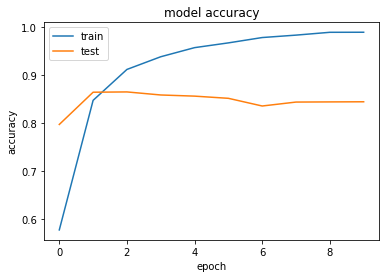

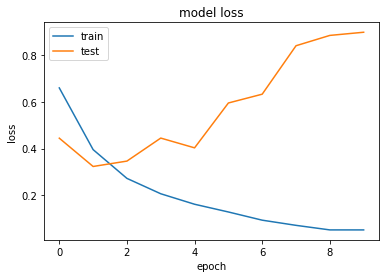

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
def clean_sentences(df):
    reviews = []
    
    for sent in tqdm(df['Phrase']):
        
        # removing html content if any
        review_text = BeautifulSoup(sent).get_text()
        
        # removing non alphabetic characters
        review_text = re.sub("[^A-Za-z]", " ", review_text)
        
        # tokenizing the sentences
        words = word_tokenize(review_text.lower())
        
        # lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
        
        reviews.append(lemma_words)
        
    return reviews

In [5]:
from keras.models import model_from_json

In [6]:
json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("models/aug_model.h5")

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.preprocessing import sequence

In [16]:
d = imdb.get_word_index()

In [17]:
review = '''Obviously lots of battles, but not too gory. There is one scene where a guy gets throat slashed. A little blood but not too bad (not a main character. Some bad words but used comically and again, nothing that bad. Good story. No sexual content. The battle scenes are big, but not bloody and lightened up at times with bits of comedy. A main character does die at the end and it is sad but it's done respectfully and not overly dramatic. I would say 9 or 10 minimum age (if they have already seen avengers movies). 3 hours, but didn't get boring.'''

Recall that the Keras format for movie reviews expects all lower-case letters, with all punctuation removed except the single-quote character. The get_word_index() function returns a Python dictionary object that was created from the 25,000-item training data. The dictionary is 1-base indexed and constructed by word frequency. For example, d["the"] = 1, d["and"] = 2.

Next, the words in the new review are converted to integer ID values:

In [18]:
words = review.split()
review = []
for word in words:
  if word not in d: 
    review.append(2)
  else:
    review.append(d[word]+3) 

Recall that words that are rare (not among the 20,000 most common) or aren't in the training data have a special ID value of 2. Also, each ID is offset by 3 to make room for special values 0, 1, 2 and 3.

The demo concludes by truncating/padding the review and computing the predicted sentiment:

In [19]:
review = sequence.pad_sequences([review], maxlen=200)
prediction = model.predict(review)
print("Prediction (0 = negative, 1 = positive) = ", end="")
print("%0.2f" % prediction[0][0])

Prediction (0 = negative, 1 = positive) = 0.47
